# k-fold cross validation

##### k-cross validation is a model validation technique in which we spilt the data into n numbers and perfrom the model validation to understand the accuracy of the model over majority of data.


In [13]:
'''Based on the tutorial provided in the instruction, below is a 
   model validation/evaluatation of a logistic regression model using k-fold cross-validation
    First I imported some required library of mean and standard deviation, and sklearn is being used to get the other related 
    functions
'''

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# We create a dataset using make_classfication method, where we took sample of 1000 data with 20 featuers
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Next we prepared the cross-validation procedure with 10 splits
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# build the Logistic regression model
model = LogisticRegression()
# Fit and validate the  model
validation_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f with a sample standard deviation of : (%.3f)' % (mean(validation_scores), std(validation_scores)))

Accuracy: 0.868 with a standard deviation of : (0.032)


### Similar to that, as instruced in the given post, I did the same cross-validation for repeated k-folds

In [14]:
# Imported the RepeatKfold library
from sklearn.model_selection import RepeatedKFold

# recreate the dataset with 1000 samples again
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Prepared the repeated k-fold cross-validation procedure with 10 splits and 3 times repeating
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression()

# Fit and validate the  model
validation_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f with a sample standard deviation of (%.3f)' % (mean(validation_scores), std(validation_scores)))

Accuracy: 0.867 with a standard deviation of (0.031)


### We can see that at repeat value 3, there is no significant difference between the accuracy. So next we will compare for a range of repeat values and will observe the difference in accuracy and will plot it.

In [23]:
from scipy.stats import sem
from matplotlib import pyplot

# Created a evaluate_model funtion to validate the model at diffrent value of repeats
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = LogisticRegression()  
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# recreate the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# Gave a range of repeating times from 1 to 15 and storing the result in a list 
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    # summarize
    print('The accuracy for repeat %d is %.4f with a standard error of=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)


The accuracy for repeat 1 is 0.8680 with a standard error of=0.011
The accuracy for repeat 2 is 0.8675 with a standard error of=0.008
The accuracy for repeat 3 is 0.8673 with a standard error of=0.006
The accuracy for repeat 4 is 0.8670 with a standard error of=0.006
The accuracy for repeat 5 is 0.8658 with a standard error of=0.005
The accuracy for repeat 6 is 0.8655 with a standard error of=0.004
The accuracy for repeat 7 is 0.8651 with a standard error of=0.004
The accuracy for repeat 8 is 0.8651 with a standard error of=0.004
The accuracy for repeat 9 is 0.8656 with a standard error of=0.003
The accuracy for repeat 10 is 0.8658 with a standard error of=0.003
The accuracy for repeat 11 is 0.8655 with a standard error of=0.003
The accuracy for repeat 12 is 0.8654 with a standard error of=0.003
The accuracy for repeat 13 is 0.8652 with a standard error of=0.003
The accuracy for repeat 14 is 0.8651 with a standard error of=0.003
The accuracy for repeat 15 is 0.8653 with a standard erro

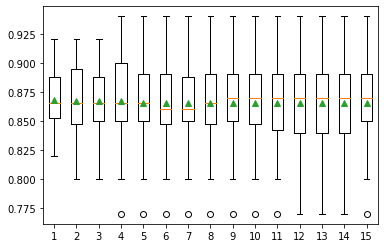

In [24]:
# plot the results as a boxplot 
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

### As a result, we saw that when repeated kfold implementation is implemented then after the 5th repeat the accuracy remains almost constant.
### Next I will be trying to increase the accuracy and to achieve that, I'll try some other classfication model such as Gradient Boosting and random forest as follows : 

In [34]:
# recreating the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
#  cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#### Gradient Boosting modeling

In [32]:
#Import the Gradient Boosting Classfier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('The Accuracy with Gradient Boosting Classfier is : %.3f with sample standard deviation of (%.3f)' % (mean(scores), std(scores)))

The Accuracy with Gradient Boosting Classfier is : 0.920 with sample standard deviation of (0.025)


#### Next I tried the  Random Forest model with same dataset

In [35]:
#Import the Random Forest Classfier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('The Accuracy with Random Forest Classfier is: %.3f with sample standard deviation of (%.3f)' % (mean(scores), std(scores)))

The Accuracy with Random Forest Classfier is: 0.921 with sample standard deviation of (0.021)


### We can see that random forest model show slightly higher accuracy 92.1%. So we will validate the random forest classfication on  Repeated K-fold validation at 3 repeats

In [37]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('The Accuracy with Random Forest Classfier with 3 repeat k-fold validation is: %.3f with sample standard devaition of (%.3f)' % (mean(scores), std(scores)))

The Accuracy with Random Forest Classfier with 3 repeat k-fold validation is: 0.923 with sample standard devaition of (0.026)


### We can see that there is a slight increament in accuracy at 3 repeat. Hence as instructed in the blog we will repeat the process of 1 to 15 repeats.

In [38]:
# created another evaluate model with randomforest classifier model
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = RandomForestClassifier()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# recreate dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    # summarize
    print('The accuracy with Random Forest Classfierfor at repeat %d is %.4f with a standard error of =%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)


The accuracy with Random Forest Classfierfor at repeat 1 is 0.9220 with a standard error of =0.008
The accuracy with Random Forest Classfierfor at repeat 2 is 0.9200 with a standard error of =0.008
The accuracy with Random Forest Classfierfor at repeat 3 is 0.9197 with a standard error of =0.006
The accuracy with Random Forest Classfierfor at repeat 4 is 0.9215 with a standard error of =0.004
The accuracy with Random Forest Classfierfor at repeat 5 is 0.9204 with a standard error of =0.004
The accuracy with Random Forest Classfierfor at repeat 6 is 0.9195 with a standard error of =0.004
The accuracy with Random Forest Classfierfor at repeat 7 is 0.9211 with a standard error of =0.003
The accuracy with Random Forest Classfierfor at repeat 8 is 0.9165 with a standard error of =0.003
The accuracy with Random Forest Classfierfor at repeat 9 is 0.9201 with a standard error of =0.003
The accuracy with Random Forest Classfierfor at repeat 10 is 0.9224 with a standard error of =0.003
The accur

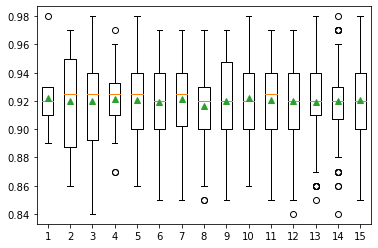

In [39]:
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

### Summary :

#### We can see that the accuracy is highest at n =10 with 92.24 % and standard error is 0.003, and apart from that it's 92.20 in the begining at n=1 with standard error of 0.008, when we use Random Forest Classifier model, which is better than the logistic regression model.